# Landsat-8 Level1 (GeoTIFF)

Landst 8 is a unique resource for those who work in agriculture, geology, forestry, regional planning, education, mapping, and global change research. It is a multi-spectral imaging mission, capturing visible, infrared bands, and thermal bands since February 2013. This block is a L1 (TOA) data block that is AOI-clipped, which outputs a single GeoTIFF file and will store the AOI within the output feature geometry.

In [2]:
import up42

In [3]:
# Authenticate and initialize project
up42.authenticate(project_id="1234", 
                  project_api_key="abcd")
project = up42.initialize_project()

2021-03-17 18:52:01,407 - Authentication with UP42 successful!
2021-03-17 18:52:02,426 - Initialized Project(name: Landsat8-data-example, project_id: 5b02d5a8-bb02-40c4-a89f-47888691d35f, description: , createdAt: 2021-03-17T15:28:29.053690Z)


In [4]:
# Define the aoi 
namib_desert_aoi = {"type": "FeatureCollection","features": [{"type": "Feature","properties": {},
      "geometry": {"type": "Polygon","coordinates": [[[14.610298,-24.516841],
                                                      [14.622478,-24.516841],
                                                      [14.622478,-24.50833],
                                                      [14.610298,-24.50833],
                                                      [14.610298,-24.516841]]]}}]}

In [5]:
# Construct the workflow
workflow = project.create_workflow(name="Landsat8-Geotiff-example", use_existing=True)
input_tasks = ["sentinelhub-landsat8-aoiclipped"]
workflow.add_workflow_tasks(input_tasks)

2021-03-17 18:52:12,014 - Getting existing workflows in project ...
2021-03-17 18:52:12,517 - Got 1 workflows for project 5b02d5a8-bb02-40c4-a89f-47888691d35f.
100%|██████████| 1/1 [00:00<00:00,  1.84it/s]
2021-03-17 18:52:13,075 - Using existing workflow: Landsat8-Geotiff-example - 94cd8439-b0a2-40e6-98cc-927cecdad4ee
2021-03-17 18:52:16,667 - Added tasks to workflow: [{'name': 'sentinelhub-landsat8-aoiclipped:1', 'parentName': None, 'blockId': '95519b2d-09d7-4cd0-a321-4d6a46bef6c1'}]


In [7]:
# Define the aoi and input parameters of the workflow to run it
input_parameters = workflow.construct_parameters(geometry=namib_desert_aoi, 
                                                 geometry_operation='bbox', 
                                                 start_date="2018-11-07",
                                                 end_date="2020-12-31")
input_parameters["sentinelhub-landsat8-aoiclipped:1"].update({"max_cloud_cover":100})  

In [8]:
# Estimate parameters
workflow.estimate_job(input_parameters)

2021-03-17 18:53:22,049 - Estimated: 2-2 Credits, Duration: 0-0 min.


{'sentinelhub-landsat8-aoiclipped:1': {'blockConsumption': {'resources': {'unit': 'MEGAPIXEL',
    'min': 0.065536,
    'max': 0.065536},
   'credit': {'min': 1, 'max': 1}},
  'machineConsumption': {'duration': {'min': 0, 'max': 0},
   'credit': {'min': 1, 'max': 1}}}}

In [9]:
# Run a test job to query data availability and check the configuration.
test_job = workflow.test_job(input_parameters, track_status=True)

2021-03-17 18:53:35,891 - +++++++++++++++++++++++++++++++++
2021-03-17 18:53:35,893 - Running this job as Test Query...
2021-03-17 18:53:35,894 - +++++++++++++++++++++++++++++++++
2021-03-17 18:53:35,896 - Selected input_parameters: {'sentinelhub-landsat8-aoiclipped:1': {'time': '2018-11-07T00:00:00Z/2020-12-31T23:59:59Z', 'limit': 1, 'zoom_level': 12, 'max_cloud_cover': 100, 'bbox': [14.610298, -24.516841, 14.622478, -24.50833]}, 'config': {'mode': 'DRY_RUN'}}
2021-03-17 18:53:37,349 - Created and running new job: 81c9c46c-9d30-477f-9ecd-ad5c1565178a.
2021-03-17 18:53:37,969 - Tracking job status continuously, reporting every 30 seconds...
2021-03-17 18:54:06,150 - Job finished successfully! - 81c9c46c-9d30-477f-9ecd-ad5c1565178a


In [10]:
# Run the actual live job
job = workflow.run_job(input_parameters, track_status=True)

2021-03-17 18:59:26,530 - Selected input_parameters: {'sentinelhub-landsat8-aoiclipped:1': {'time': '2018-11-07T00:00:00Z/2020-12-31T23:59:59Z', 'limit': 1, 'zoom_level': 12, 'max_cloud_cover': 100, 'bbox': [14.610298, -24.516841, 14.622478, -24.50833]}}
2021-03-17 18:59:32,778 - Created and running new job: 8e616205-4f31-42f5-943f-ef4adec103ae.
2021-03-17 18:59:33,456 - Tracking job status continuously, reporting every 30 seconds...
2021-03-17 19:00:07,237 - Job finished successfully! - 8e616205-4f31-42f5-943f-ef4adec103ae


In [ ]:
# Download results
job.download_results()

#### B04, B03, B02 are equivalent to RGB, for visualisation, we chose these bands for better aesthetics

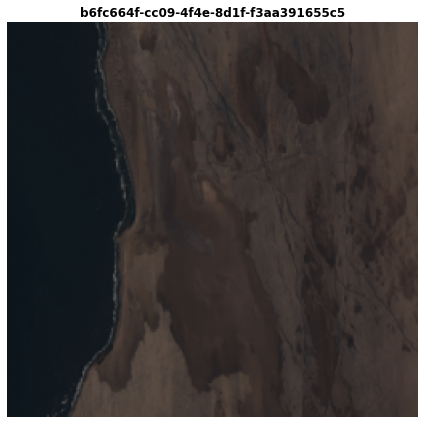

In [12]:
# Plot the results
job.plot_results(figsize=(6,6), bands=[4,3,2])